In [1]:
import numpy as np
import matplotlib.pyplot as plt

wsl_path = r'\\wsl$\Ubuntu\home\alepitte\ale\uni\variational-autoencoders\mc-sampling\dump\test_30_20_0.05_0.3_0.1_1000_1000_100_x.txt'
#wsl_path = r'\\wsl$\Ubuntu\home\alepitte\ale\uni\pos.txt'

data = np.loadtxt(wsl_path)

In [2]:
data[0]

array([11.818448,  7.962892,  6.326937, 13.154336,  0.406715, 12.744995,
       12.333483,  3.841816,  3.488541, 12.858959, 16.63225 ,  8.378659,
       12.403021, 11.140971, 13.63468 ,  8.864957, 16.945189, 14.227598,
       15.710501, 13.750603,  2.667354,  6.943121,  1.008171,  4.139648,
       11.715454, 19.933899,  2.114819,  2.156741, 17.519073,  7.210783,
        7.440065, 19.399089,  4.672639, 13.976682,  0.370312, 13.59172 ,
       16.149514,  4.245688, 11.735246, 17.815954, 11.085574, 13.32575 ,
        4.243096, 11.133054, 18.239782,  6.154853, 12.130575, 10.197033,
       19.377341,  4.610559, 19.005724, 10.703493, 18.371969, 10.952687,
        3.918711, 16.83804 ,  8.526352, 16.55893 ,  5.5775  ,  0.922603,
        9.32416 ,  2.73719 , 12.818227,  1.276118,  6.149165, 15.940473,
       15.920569,  7.881579, 17.478261, 15.407406, 12.787387,  3.245417,
       12.027587,  4.888588,  4.018342, 19.069778,  0.816515, 12.56498 ,
       11.354227,  4.976604,  5.584382,  6.173461, 

In [3]:
start = 0
data = data[start:]

In [4]:
max_corr = float( np.correlate(data[0], data[0]) )
max_corr

11290.430525710315

In [5]:
acf_list = []
c = 0
t = []
for k, config in enumerate(data):
    acf = np.correlate(data[c], config)/max_corr
    acf_list.append(acf)
    if acf<0.1:
        c=k
        t.append(c)
        

In [6]:
dt = [t[i+1]-t[i] for i in range(len(t)-1)]
np.mean(dt) #mean decorr time

C:\Users\prontoalluso\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\prontoalluso\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

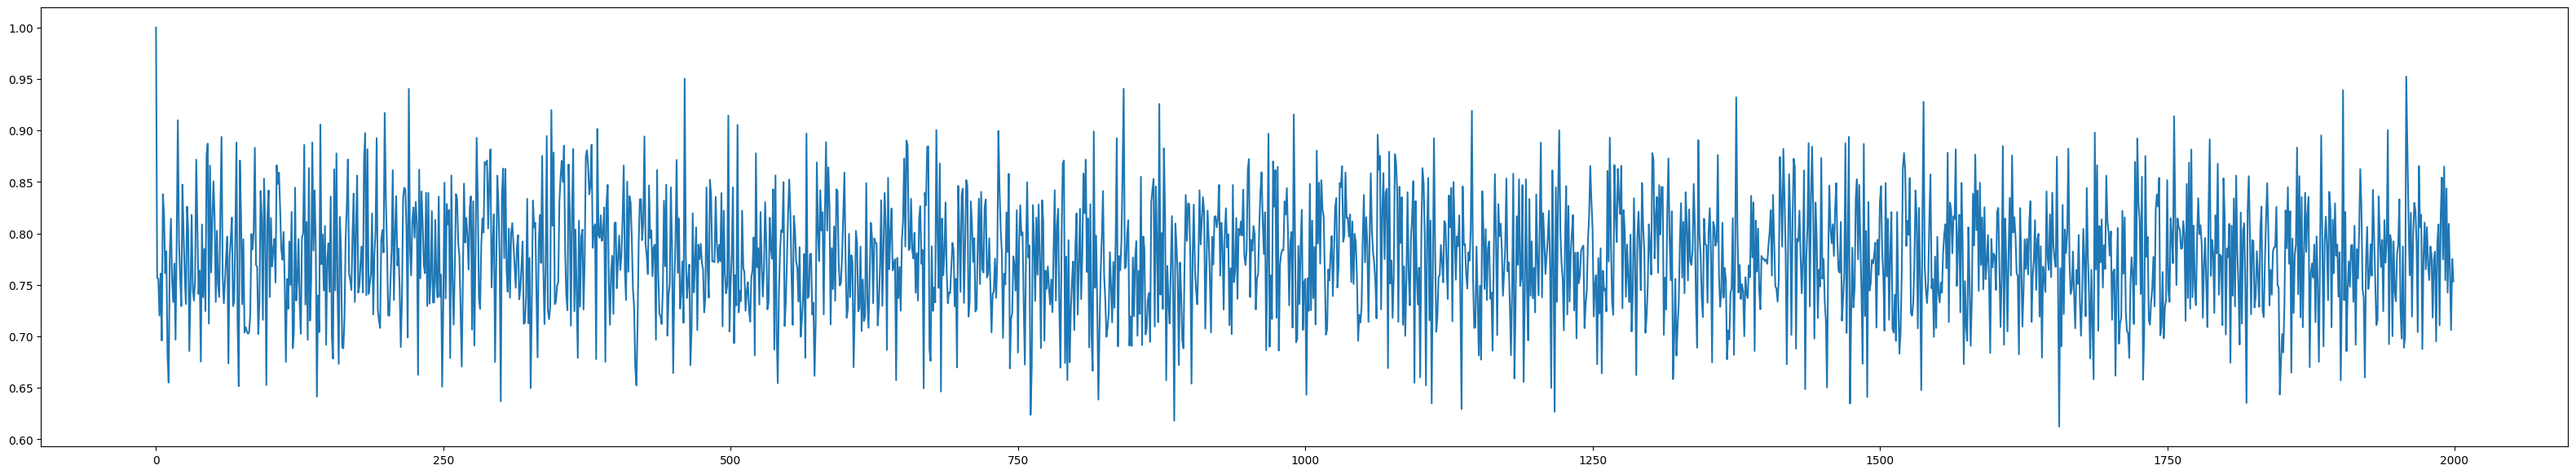

In [7]:
fig, ax = plt.subplots(figsize=(40,7))
ax.plot(acf_list, )

In [8]:
data[-1]


array([ 8.337858,  4.920757,  4.816602, 16.647335,  1.617506, 15.360124,
       16.925281, 11.217999, 17.710958, 10.391942, 12.518749, 12.733297,
        9.827797,  7.307725, 13.804822,  8.628233, 19.733881,  5.823589,
        6.112832, 10.921611, 14.527745,  1.346025,  6.161656, 13.319722,
        4.95636 ,  0.589632,  0.719139,  0.828551, 18.487817,  3.687762,
       15.799503, 11.059198,  1.48689 ,  9.372493, 19.437707,  3.18753 ,
       14.661854,  8.755221, 16.328828,  1.831591, 18.155759,  3.33323 ,
       15.424383, 19.593095,  8.685645,  0.91914 , 14.819754,  1.330031,
       19.762826,  6.463917,  3.96103 , 13.814752,  8.136832, 15.896914,
        3.708604,  2.715274, 17.950693, 10.891889,  6.291427,  0.7241  ,
       13.401445, 15.939427,  2.462778,  2.049307,  3.616714,  5.33144 ,
        8.693544,  5.923197,  7.165778, 10.499771, 11.244132, 13.068202,
       18.992335,  3.900307, 19.827536,  4.615157, 13.211974, 17.540955,
        3.412236,  3.392031,  3.27506 ,  2.08064 , 

ValueError: cannot reshape array of size 90 into shape (30,2)

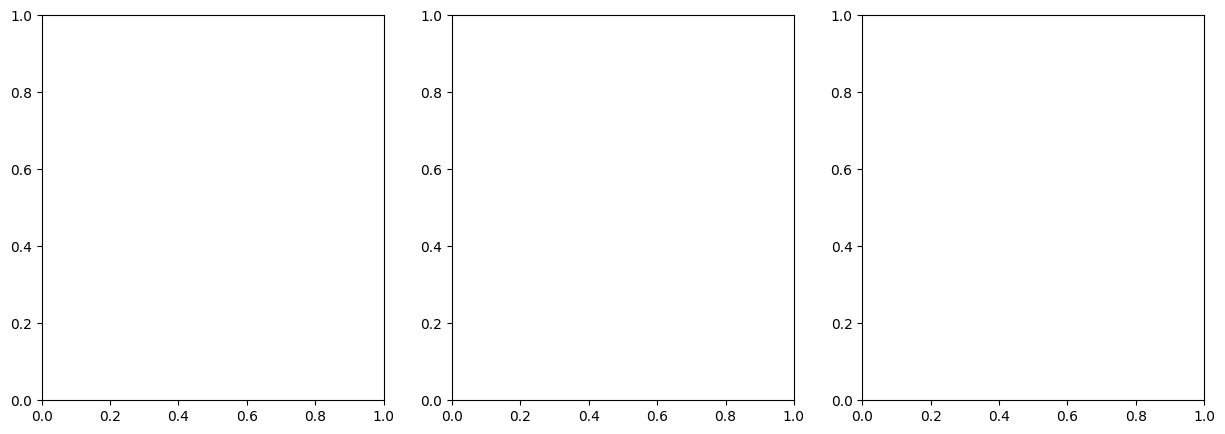

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].scatter( data[-1].reshape(30,3)[:,0], data[-1].reshape(30,2)[:,1], s=5)
ax[1].scatter( data[0].reshape(30,3)[:,0], data[-1].reshape(30,3)[:,2], s=5)
ax[2].scatter( data[0].reshape(30,3)[:,1], data[-1].reshape(30,3)[:,2], s=5)
ax[0].set_xlim([0,10])
ax[0].set_ylim([0,10])
ax[1].set_xlim([0,5])
ax[1].set_ylim([0,5])
ax[2].set_xlim([0,5])
ax[2].set_ylim([0,5])

In [10]:
import numpy as np

def acf(data, h):
    numerator = np.sum(data[h:len(data)-1] * data[0:(len(data)-h-1)])
    denominator = len(data[0]) * (len(data)-h)
    return numerator / denominator

def get_correls(data, step=100, stop=None):
    correls = []
    c0=1
    if stop is None:
        stop = (len(data) // step - 1)
        print(stop)
    for i in range(stop+1):
        a = acf(data, i*step)
        if len(correls)!=0:
            a/=c0
        else:
            c0=a
            a=1
        correls.append(a)
        # print([i*step, a])
    return correls


In [11]:
corr = get_correls(data, step=1)

1999


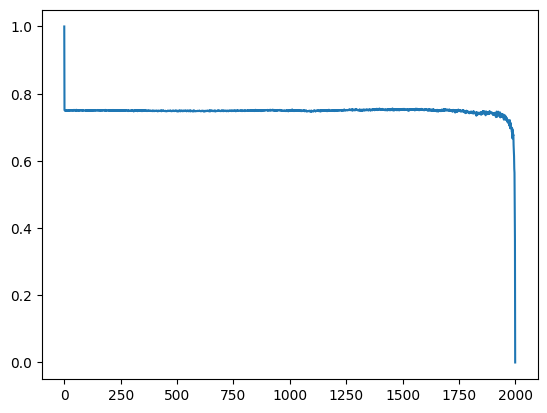

In [12]:
plt.plot(corr)

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x000001C7ECC07B80> (for post_execute):


ValueError: cannot reshape array of size 90 into shape (30,2)

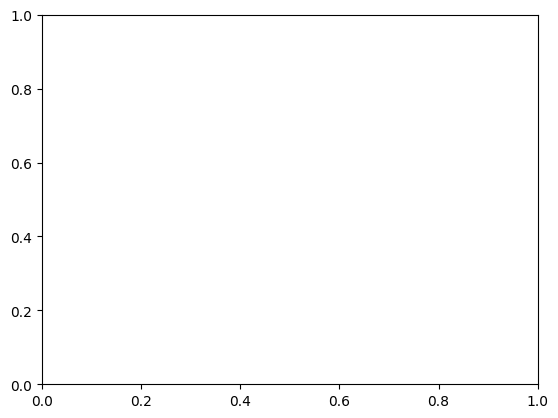

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and axis objects
fig, ax = plt.subplots()

nframes = 1000

# Define the animation function
def update(frame):
    ax.clear()
    ax.scatter(data[frame].reshape(30,2)[:,0], data[frame].reshape(30,2)[:,1])
    ax.set_title(f"Scatter plot ({frame}/{nframes})")
    ax.set_xlim(0,5)
    ax.set_ylim(0,5)

# Create the animation
animation = FuncAnimation(fig, update, frames=nframes, interval=100)

# Save the animation as a GIF
animation.save("scatter.gif", writer="imagemagick")
